In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC  

from sklearn.metrics import accuracy_score, classification_report

In [2]:
#pip install lime

In [3]:
file = "D:/Study material/sem8/data/heart_train.csv"
data_train = pd.read_csv(file)
print("Heart Data")
data_train.head(10)

Heart Data


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   54   F           ATA        160          312          0     Normal    130   
1   58   M           NAP        160          211          1         ST     92   
2   58   M           ATA        130          251          0     Normal    110   
3   41   M           ASY        120          237          1     Normal    138   
4   50   F           ASY        120          328          0     Normal    110   
5   53   M           ASY        180          285          0         ST    120   
6   46   M           ASY        180          280          0         ST    120   
7   50   M           ATA        170          209          0         ST    116   
8   48   M           ATA        130          245          0     Normal    160   
9   45   M           NAP        135          192          0     Normal    110   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      0.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.0     Flat             1  
4              Y      1.0     Flat             0  
5              Y      1.5     Flat             1  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              N      0.0       Up             0  
9              N      0.0       Up             0

In [4]:
data_train.shape

(734, 12)

In [5]:
file = "D:/Study material/sem8/data/heart_test.csv"
data_test = pd.read_csv(file)
print("Heart Data")
data_test.head(10)

Heart Data


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [6]:
data_test.shape

(184, 12)

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [7]:
data_train["Sex"] = data_train["Sex"].replace(["M","F"],[0,1])
data_test["Sex"] = data_test["Sex"].replace(["M","F"],[0,1])

In [8]:
data_train["ChestPainType"] = data_train["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])
data_test["ChestPainType"] = data_test["ChestPainType"].replace(["ASY","NAP","ATA","TA"],[0,1,2,3])

In [9]:
data_train["RestingECG"] = data_train["RestingECG"].replace(["Normal","LVH","ST"],[0,1,2])
data_test["RestingECG"] = data_test["RestingECG"].replace(["Normal","LVH","ST"],[0,1,2])

In [10]:
data_train["ExerciseAngina"] = data_train["ExerciseAngina"].replace(["N","Y"],[0,1])
data_test["ExerciseAngina"] = data_test["ExerciseAngina"].replace(["N","Y"],[0,1])

In [11]:
data_train["ST_Slope"] = data_train["ST_Slope"].replace(["Flat","Up","Down"],[0,1,2])
data_test["ST_Slope"] = data_test["ST_Slope"].replace(["Flat","Up","Down"],[0,1,2])

In [12]:
data_train.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   54    1              2        160          312          0           0   
1   58    0              1        160          211          1           2   
2   58    0              2        130          251          0           0   
3   41    0              0        120          237          1           0   
4   50    1              0        120          328          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    130               0      0.0         1             0  
1     92               0      0.0         0             1  
2    110               0      0.0         1             0  
3    138               1      1.0         0             1  
4    110               1      1.0         0             0

In [13]:
y_train = data_train["HeartDisease"]
x_train = data_train.drop(["HeartDisease"],axis=1)

In [14]:
y_train.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [15]:
x_train.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   54    1              2        160          312          0           0   
1   58    0              1        160          211          1           2   
2   58    0              2        130          251          0           0   
3   41    0              0        120          237          1           0   
4   50    1              0        120          328          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    130               0      0.0         1  
1     92               0      0.0         0  
2    110               0      0.0         1  
3    138               1      1.0         0  
4    110               1      1.0         0

In [16]:
y_test = data_test["HeartDisease"]
x_test = data_test.drop(["HeartDisease"],axis=1)

In [17]:
x_test = (x_test - np.min(x_train))/(np.max(x_train)-np.min(x_train))

C:\Users\Siva\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Siva\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [18]:
mx = np.max(x_train)
mn = np.min(x_train)
x_train = (x_train - np.min(x_train))/(np.max(x_train)-np.min(x_train))

In [19]:
print(mx)

Age                77.0
Sex                 1.0
ChestPainType       3.0
RestingBP         200.0
Cholesterol       564.0
FastingBS           1.0
RestingECG          2.0
MaxHR             202.0
ExerciseAngina      1.0
Oldpeak             6.2
ST_Slope            2.0
dtype: float64


In [20]:
print(mn)

Age               28.0
Sex                0.0
ChestPainType      0.0
RestingBP          0.0
Cholesterol        0.0
FastingBS          0.0
RestingECG         0.0
MaxHR             60.0
ExerciseAngina     0.0
Oldpeak           -2.6
ST_Slope           0.0
dtype: float64


In [21]:
x_test.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898  0.0       0.666667       0.70     0.512411        0.0   
1  0.428571  1.0       0.333333       0.80     0.319149        0.0   
2  0.183673  0.0       0.666667       0.65     0.501773        0.0   
3  0.408163  1.0       0.000000       0.69     0.379433        0.0   
4  0.530612  0.0       0.333333       0.75     0.345745        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.0  0.788732             0.0  0.295455       0.5  
1         0.0  0.676056             0.0  0.409091       0.0  
2         1.0  0.267606             0.0  0.295455       0.5  
3         0.0  0.338028             1.0  0.465909       0.0  
4         0.0  0.436620             0.0  0.295455       0.5

In [22]:
x_train.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.530612  1.0       0.666667       0.80     0.553191        0.0   
1  0.612245  0.0       0.333333       0.80     0.374113        1.0   
2  0.612245  0.0       0.666667       0.65     0.445035        0.0   
3  0.265306  0.0       0.000000       0.60     0.420213        1.0   
4  0.448980  1.0       0.000000       0.60     0.581560        0.0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0         0.0  0.492958             0.0  0.295455       0.5  
1         1.0  0.225352             0.0  0.295455       0.0  
2         0.0  0.352113             0.0  0.295455       0.5  
3         0.0  0.549296             1.0  0.409091       0.0  
4         0.0  0.352113             1.0  0.409091       0.0

In [23]:
#####Logistic Regression

In [24]:
mod1 = LogisticRegression(penalty = 'l2', solver = 'saga')
mod1.fit(x_train, y_train)
# Prediction
y_pred_lr = mod1.predict(x_test)
 
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression model", acc_lr)
result = classification_report(y_test, y_pred_lr)
print("Classifiction Report")
print(result)

Logistic Regression model 0.8586956521739131
Classifiction Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       115
           1       0.83      0.78      0.81        69

    accuracy                           0.86       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.86      0.86      0.86       184



In [25]:
######Decision Tree

In [26]:
tree1 = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=10, min_samples_leaf=6)
tree1.fit(x_train,y_train)
#Prediction
y_pred_dt = tree1.predict(x_test)
acc_tree = accuracy_score(y_test,y_pred_dt)
print("Decision Tree model", acc_tree)
result = classification_report(y_test, y_pred_dt)
print("Classifiction Report")
print(result)

Decision Tree model 0.8913043478260869
Classifiction Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       115
           1       0.85      0.87      0.86        69

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [27]:
##########KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=15, weights='distance') 
knn.fit(x_train,y_train)
#Predictin
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
print("KNN model",acc_knn)
result = classification_report(y_test, y_pred_knn)
print("Classifiction Report")
print(result)

KNN model 0.8967391304347826
Classifiction Report
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       115
           1       0.84      0.90      0.87        69

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



In [29]:
###########Random Forest

In [30]:
rcf1 = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=20, max_features='auto', n_estimators=1000)
rcf1.fit(x_train,y_train)
y_pred_rf = rcf1.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Random Forest",acc_rf)
result = classification_report(y_test, y_pred_rf)
print("Classifiction Report")
print(result)

C:\Users\Siva\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest 0.9130434782608695
Classifiction Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       115
           1       0.87      0.90      0.89        69

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [31]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=2, objective='binary:logistic')
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
acc_xg = accuracy_score(y_test,y_pred_xgb)
print("XGBoost",acc_xg)
result = classification_report(y_test, y_pred_xgb)
print("Classifiction Report")
print(result)

XGBoost 0.8695652173913043
Classifiction Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       115
           1       0.82      0.84      0.83        69

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



In [32]:
ensemble = VotingClassifier(estimators=[('dt', tree1), ('rf', rcf1),('knn',knn)], voting='hard')
ensemble.fit(x_train,y_train)
y_pred_hb = ensemble.predict(x_test)
acc_esb = accuracy_score(y_test,y_pred_hb)
print("Hybrid model",acc_esb)
result = classification_report(y_test, y_pred_hb)
print("Classifiction Report")
print(result)

C:\Users\Siva\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Hybrid model 0.9130434782608695
Classifiction Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       115
           1       0.86      0.91      0.89        69

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

estimators = [('rf', RandomForestClassifier(n_estimators=40, random_state=42))]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression())

clf.fit(x_train,y_train)
y_pred_st = clf.predict(x_test)
acc_st = accuracy_score(y_test,y_pred_st)
print("Hybrid model",acc_st)
result = classification_report(y_test, y_pred_st)
print("Classifiction Report")
print(result)

Hybrid model 0.907608695652174
Classifiction Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       115
           1       0.85      0.91      0.88        69

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.91      0.91       184



Ttest_1sampResult(statistic=array([  9.99789894,   9.99789894,   9.99789894, -18.30384575,
         9.99789894,   9.99789894,   9.99789894,   9.99789894,
       -18.30384575,   9.99789894,   9.99789894, -18.30384575,
         9.99789894, -18.30384575,   9.99789894,   9.99789894,
       -18.30384575,   9.99789894, -18.30384575, -18.30384575,
         9.99789894,   9.99789894,   9.99789894, -18.30384575,
         9.99789894,   9.99789894, -18.30384575,   9.99789894,
         9.99789894,   9.99789894, -18.30384575,   9.99789894,
       -18.30384575, -18.30384575,   9.99789894,   9.99789894,
       -18.30384575,   9.99789894,   9.99789894, -18.30384575,
         9.99789894, -18.30384575,   9.99789894,   9.99789894,
       -18.30384575, -18.30384575,   9.99789894,   9.99789894,
       -18.30384575, -18.30384575, -18.30384575, -18.30384575,
         9.99789894,   9.99789894, -18.30384575,   9.99789894,
       -18.30384575, -18.30384575,   9.99789894, -18.30384575,
         9.99789894,   9.99

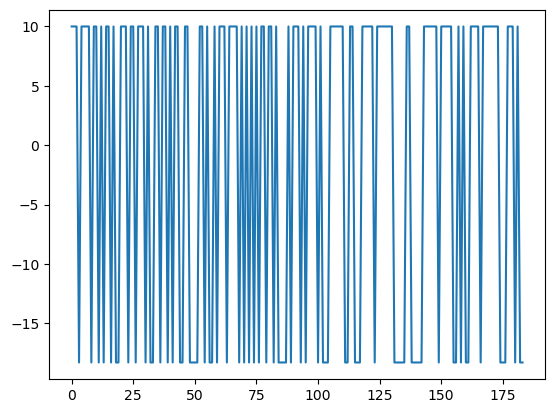

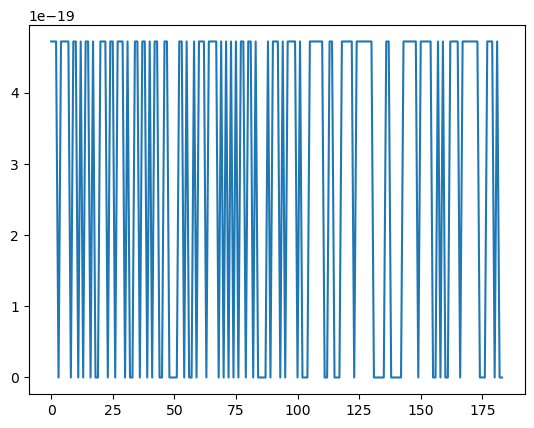

In [67]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(y_pred_lr,y_pred_hb)
print(stats.ttest_1samp(y_pred_lr,y_pred_hb))
plt.plot(t_stat)
plt.show()
plt.plot(p_value)

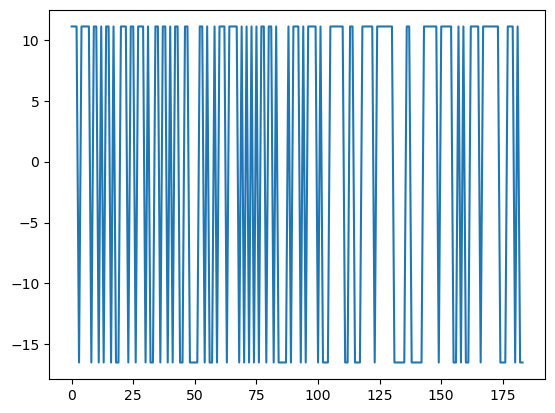

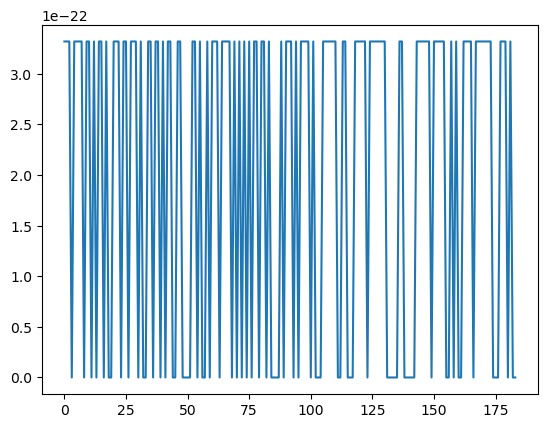

In [34]:
t_stat, p_value = stats.ttest_1samp(y_pred_knn,y_pred_hb)
plt.plot(t_stat)
plt.show()
plt.plot(p_value)

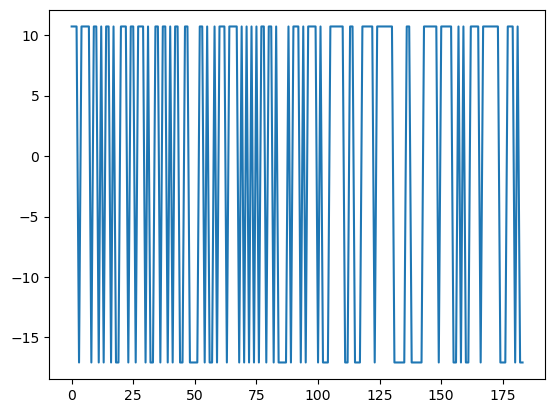

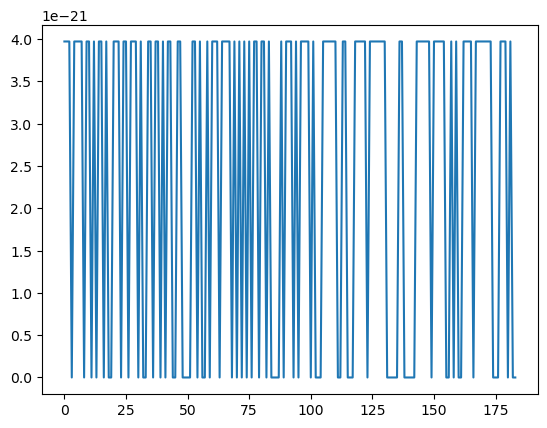

In [35]:
t_stat, p_value = stats.ttest_1samp(y_pred_dt,y_pred_hb)
plt.plot(t_stat)
plt.show()
plt.plot(p_value)

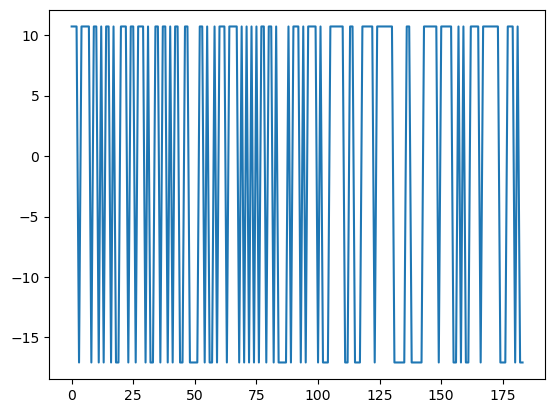

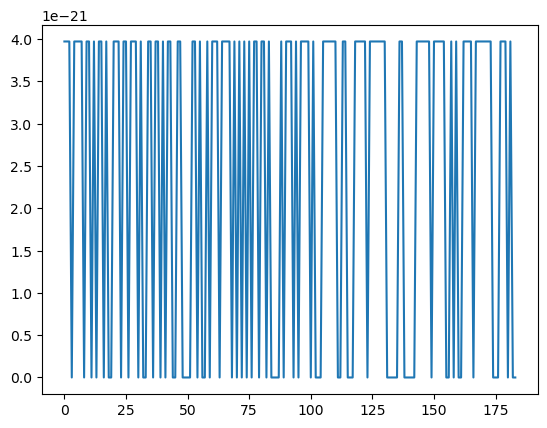

In [36]:
t_stat, p_value = stats.ttest_1samp(y_pred_rf,y_pred_hb)
plt.plot(t_stat)
plt.show()
plt.plot(p_value)

C:\Users\Siva\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


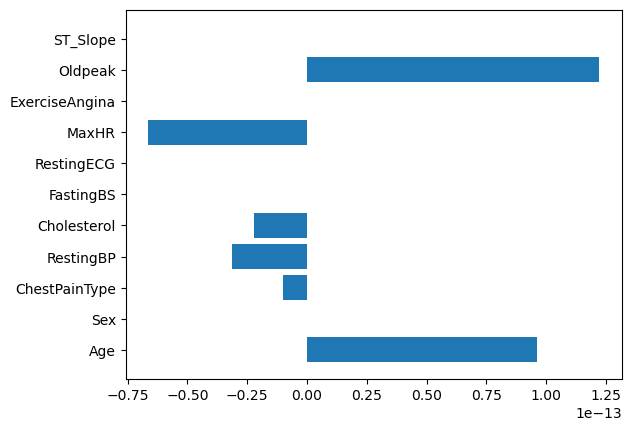

In [37]:
t_stat, p_value = stats.ttest_1samp(x_train,np.mean(x_train))
y = t_stat
x = ['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG','MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
plt.barh(x,y)
plt.show()

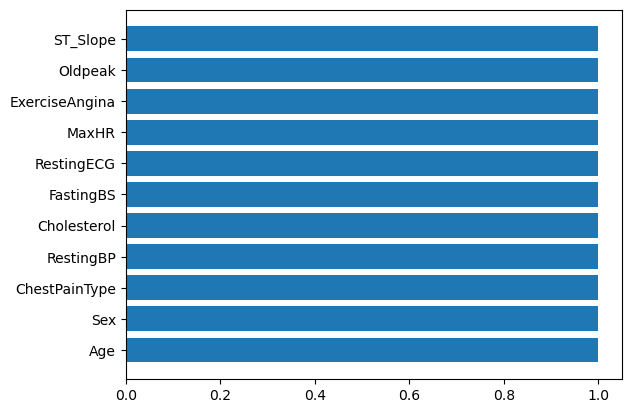

In [38]:
y = p_value
x = ['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG','MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
plt.barh(x,y)
plt.show()

In [39]:
from scipy.stats import f_oneway
f_oneway(y_pred_lr,y_pred_knn,y_pred_rf,y_pred_dt,y_pred_xgb,y_pred_hb)

F_onewayResult(statistic=0.22319395591816332, pvalue=0.9525945701393999)

0.3967391304347826 0.4892210061072962


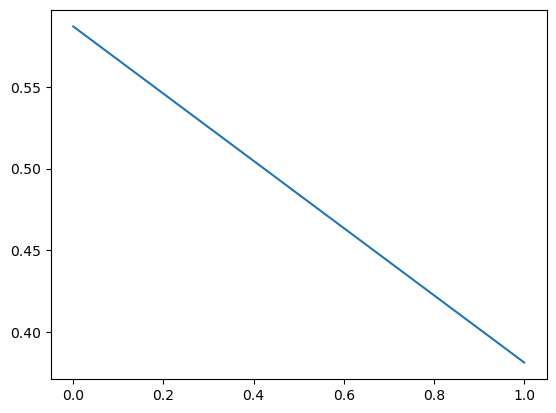

In [40]:
from scipy.stats import norm 

x_axis = y_pred_hb
mean = np.mean(x_axis) 
sd = np.std(x_axis) 
print(mean,sd)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd)) 
plt.show() 

# EXPLAINABLE MODEL

Using lime library

In [34]:
from lime import lime_tabular

In [35]:
explainer = lime_tabular.LimeTabularExplainer(training_data = np.array(x_train), 
                                               mode = "regression", feature_names = x_train.columns)


In [36]:
explain = explainer.explain_instance(data_row = x_test.iloc[3], predict_fn = ensemble.predict)
explain.show_in_notebook(show_table = True)

C:\Users\Siva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Siva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Siva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


PermutationExplainer explainer: 185it [58:23, 19.04s/it]                                                               


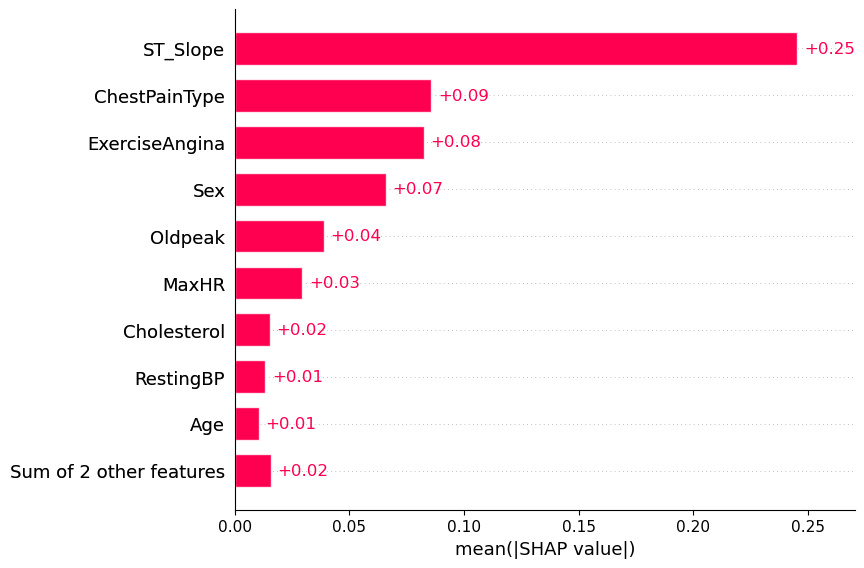

In [37]:
import shap
shap_explainer = shap.Explainer(ensemble.predict, x_test)
shap_values = shap_explainer(x_test)
shap.plots.bar(shap_values)

In [45]:
print(y_test[3])

1


In [46]:
lst = explain.as_list()
lst.sort()
print(lst)

[('0.00 < ExerciseAngina <= 1.00', 0.23519662159696142), ('0.25 < Cholesterol <= 0.39', -0.05343178503172157), ('0.65 < RestingBP <= 0.70', -0.03724124514127191), ('Age <= 0.43', -0.022498776219827127), ('ChestPainType <= 0.00', 0.2752872296016646), ('FastingBS <= 0.00', -0.12891581980373568), ('MaxHR <= 0.41', 0.053866203117433425), ('RestingECG <= 0.00', -0.024651959206900702), ('ST_Slope <= 0.00', 0.3933596926686541), ('Sex > 0.00', -0.3415812595724889)]


In [47]:
def explain_function(pred,lst,inp):
    if(pred):
        print('You are in risk of a heart attack')
    else:
        print('You are not in risk of a heart attack')
    print('')
    print('################## REASON ################')
    print('')
    for ind in lst:
        if(ind[1]>0 and pred==0):
            continue
        if(ind[1]<0 and pred==1):
            continue
        var_name = ''
        num = ''
        temp_lst = []
        for j in ind[0]:
            if((j>='a' and j<='z') or (j>='A' and j<='Z') or j=='_'):
                var_name = var_name + j
            if((j>='0' and j<='9') or j=='.'):
                num = num + j
            elif(num):
                temp_lst.append(float(num))
                num = ''
        if(num):
            temp_lst.append(float(num))
        
        conclu = ''
        if(ind[1]>0.0):
            conclu =  'This factor increases the risk of a heart attack'
        else:
            conclu = 'This factor reduces the risk of a heart attack'       
        
        #if(len(temp_lst)==1):
        #    non_normal_val = mx[var_name]*temp_lst[0] + mn[var_name]
        #    if('<' in ind[0]):
        #        print('Entered',var_name,'is less than',non_normal_val)
        #    elif('>' in ind[0]):
        #        print('Entered',var_name,'is greater than',non_normal_val)
        #    else:
        #        print('Entered',var_name,'is equal to',non_normal_val)
        #else:
        #    print('Entered', var_name,'int between',mx[var_name]*temp_lst[0] + mn[var_name],'and',mx[var_name]*temp_lst[1] + mn[var_name])
        print('Entered',var_name,'is', inp[diction[var_name]])
        print(conclu)
        print('')
    

In [58]:
##############

In [41]:
import humingbird
import random

In [76]:
intents = {
  "age": ["As age increases the risk of heart attack increases. Have a safe diet and exerice regulary and you should be fine!"],
  "chest pain": ["Frequent chest pain can be a sign of heart attack. Its better to get a doctor's opinion regarding it."],
  "Blood pressure": ["Normal blood pressure is 120. Clearly your blood pressure is higher than normal. Follow a healthy diet and exericse regularly to control your BP"],
  "Cholesterol ": ["Your cholesterol level is a bit high! It is recommended to change your diet and keep it under control since it poses a risk of heart attack"],
  "Blood sugar": ["Your blood sugar level has exceded normal limit. Monitor it carefully and keep it under control. Consult a doctor for further clarifications"],
  "ECG": ["Please consult a doctor as your ECG levels are not normal"],
  "Heart Rate": ["Your heart rate is high and needs to be controlled. It can be done be following a healthy diet and exercising"],
   "EXNG": ["Please consult a doctor immediately since you have experinced exercise induced angina and get it checked out."],
    "ST Slope": ["You have abnormal ST slope values. This can be a serious risk and needs to be cleared by a doctor immediately."]
}
def detect_and_respond(query):
    prediction = humingbird.Text.predict(
    text=query,
    labels=["age", "chest pain", "Blood pressure", "Cholesterol", "Blood sugar","ECG","Heart Rate","EXNG","ST Slope"]
    )
    highest_score = 0
    highest_score_class = ""
    for i in prediction:
        if i["score"] > highest_score:
            highest_score = i["score"]
            highest_score_class = i["className"]
    return random.choice(intents[highest_score_class])


In [78]:
detect_and_respond("My heart rate is high")

'Your heart rate is high and needs to be controlled. It can be done be following a healthy diet and exercising'

In [62]:
age = int(input('Enter age '))
gend = 1 if(input('Enter gender M or F ')=='M')else 0
cp = int(input('Enter chest pain type '))
bp = int(input('Enter blood pressure '))
chol = int(input('Enter cholestrol level '))
fbs = int(input('Enter blood sugar value '))
restecg = int(input('Enter ECG value if available else enter 0'))
hr = int(input('Enter heart rate '))
exng = 1 if(input('Enter YES if you have expirienced exercise induced angia else NO ') =='YES') else 0
oldpeak = int(input('Enter old peak value of heart rate without any exercise if available else enter -1 ')) 
st_slope =  int(input('Enter ST Slope value if available else enter -1 '))                                
                  
if(oldpeak == -1): oldpeak = np.mean(data_train['Oldpeak'])
if(st_slope == -1): st_slope = np.mean(data_train['ST_Slope'])
 

Enter age 40
Enter gender M or F M
Enter chest pain type 2
Enter blood pressure 140
Enter cholestrol level 290
Enter blood sugar value 0
Enter ECG value if available else enter 01
Enter heart rate 172
Enter YES if you have expirienced exercise induced angia else NO NO
Enter old peak value of heart rate without any exercise if available else enter -1 0
Enter ST Slope value if available else enter -1 1


In [63]:
inp_lst = [age,gend,cp,bp,chol,fbs,restecg,hr,exng,oldpeak,st_slope]
#inp_lst = pd.DataFrame(temp_lst, columns = ['Age','Sex', 'ChestPainType', 'RestingBP', 'Cholesterol','FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
diction = {'Age':0, 'Sex':1, 'ChestPainType':2, 'RestingBP':3, 'Cholesterol':4, 'FastingBS':5, 'RestingECG':6, 'MaxHR':7, 'ExerciseAngina':8, 'Oldpeak':9, 'ST_Slope':10}

In [64]:
inp_lst

[40, 1, 2, 140, 290, 0, 1, 172, 0, 0, 1]

In [65]:
#####Normalising input values

norm_inp = inp_lst
norm_inp = (norm_inp - mn)/(mx-mn)

In [66]:
temp = []
temp.append(norm_inp)
pred = rcf1.predict(temp)[0]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [67]:
explain = explainer.explain_instance(data_row = np.array(inp_lst), predict_fn = ensemble.predict)
explain.show_in_notebook(show_table = True)

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [68]:
lst = explain.as_list()
lst.sort()

In [69]:
explain_function(pred,lst,inp_lst)

You are not in risk of a heart attack

################## REASON ################

Entered ChestPainType is 2
This factor reduces the risk of a heart attack

Entered Cholesterol is 290
This factor reduces the risk of a heart attack

Entered ExerciseAngina is 0
This factor reduces the risk of a heart attack

Entered FastingBS is 0
This factor reduces the risk of a heart attack

Entered MaxHR is 172
This factor reduces the risk of a heart attack

Entered Oldpeak is 0
This factor reduces the risk of a heart attack

Entered RestingECG is 1
This factor reduces the risk of a heart attack

Entered ST_Slope is 1
This factor reduces the risk of a heart attack

Entered Sex is 1
This factor reduces the risk of a heart attack



In [ ]:
an = [[86,86,86,86],[90,89,90,89],[91,91,91,91],[89,89,89,89],[87,87,87,87],[91,91,91,91]]
df = pd.DataFrame(an) 

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=df, color='#99c2a2')
ax = sns.swarmplot(data=df, color='#7d0013')
plt.show()

In [59]:
df = pd.read_csv("D:/Study material/sem8/data/heart_test.csv")

In [60]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0